# Empirical verification of derived quantities - covariance tests

This notebook contains part of the experiments described in Section 6 of the paper "What is the value of experimentation and measurement?"

In [6]:
import pickle
import os
from rulu.covariance_CI_test import *
from rulu.utils import find_all_tests_in_same_category
from matplotlib import pyplot as plt
# from scipy.stats import percentileofscore

In [7]:
cov_Yr_Ys_tests = find_all_tests_in_same_category(
    CovYrYsCITest(sigma_sq_1=0.5**2), 
    in_dir="./output/cov_CI_tests/")
cov_Yr_Ys_second_order_tests = find_all_tests_in_same_category(
    CovYrYsSecondOrderCITest(sigma_sq_1=0.5**2), 
    in_dir="./output/cov_CI_tests/")
cov_Yr_Zs_tests = find_all_tests_in_same_category(
    CovYrZsCITest(), in_dir="./output/cov_CI_tests/")
cov_Yr_Zs_second_order_tests = find_all_tests_in_same_category(
    CovYrZsSecondOrderCITest(), in_dir="./output/cov_CI_tests/")
cov_XIr_XJs_tests = find_all_tests_in_same_category(
    CovXIrXJsCITest(), in_dir="./output/cov_CI_tests/")
cov_XIr_XJs_second_order_tests = find_all_tests_in_same_category(
    CovXIrXJsSecondOrderCITest(), in_dir="./output/cov_CI_tests/")


In [3]:
for test_collection in [cov_Yr_Ys_tests, cov_Yr_Ys_second_order_tests,
                        cov_Yr_Zs_tests, cov_Yr_Zs_second_order_tests, 
                        cov_XIr_XJs_tests, cov_XIr_XJs_second_order_tests]:
    print_test_collection_result(test_collection)

Cov(Y_(r), Y_(s)): 4688/4940 (94.9%) of the tests have the theoretical quantity within the CI.
Cov(Y_(r), Y_(s)) - 2nd order: 4940/4940 (100.0%) of the tests have the theoretical quantity within the CI.
Cov(Y_(r), Z_(s)): 4663/4940 (94.39%) of the tests have the theoretical quantity within the CI.
Cov(Y_(r), Z_(s)) - 2nd order: 4739/4940 (95.93%) of the tests have the theoretical quantity within the CI.
Cov(X_I(r), X_J(s)): 4730/4940 (95.75%) of the tests have the theoretical quantity within the CI.
Cov(X_I(r), X_J(s)) - 2nd order: 4783/4940 (96.82%) of the tests have the theoretical quantity within the CI.


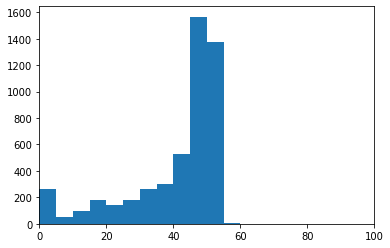

In [18]:
test_collection = cov_Yr_Ys_tests

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.hist(theoretical_quantity_percentiles, bins=range(0, 105, 5))
plt.xlim(0, 100)
plt.show()

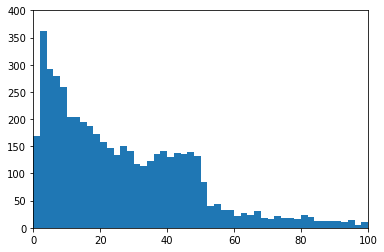

In [6]:
test_collection = cov_Yr_Zs_tests

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.hist(theoretical_quantity_percentiles, bins=range(0, 102, 2))
plt.xlim(0, 100)
plt.ylim(0, 400)
plt.show()

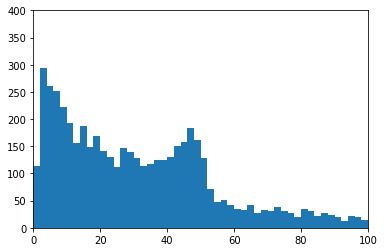

In [7]:
test_collection = cov_Yr_Zs_second_order_tests

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.hist(theoretical_quantity_percentiles, bins=range(0, 102, 2))
plt.xlim(0, 100)
plt.ylim(0, 400)
plt.show()

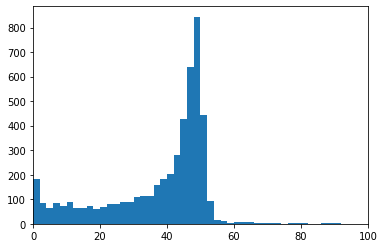

In [8]:
test_collection = cov_XIr_XJs_tests

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.hist(theoretical_quantity_percentiles, bins=range(0, 102, 2))
plt.xlim(0, 100)
plt.show()

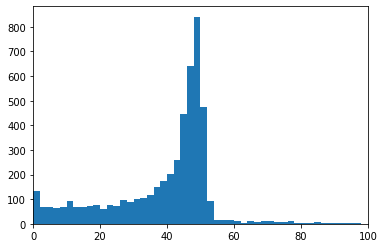

In [9]:
test_collection = cov_XIr_XJs_second_order_tests

theoretical_quantity_percentiles = [
    test.theoretical_quantity_sample_percentile()
    for test in test_collection]

plt.hist(theoretical_quantity_percentiles, bins=range(0, 102, 2))
plt.xlim(0, 100)
plt.show()

In [10]:
for test in cov_XIr_XJs_tests:
    if test.theoretical_quantity_above_sample_CI():
        print(test.N, test.r, test.s,  "    \t",
              np.round(test.sigma_sq_X, 3), 
              np.round(test.sigma_sq_1, 3), np.round(test.sigma_sq_2, 3), "\t",
              np.round(test.theoretical_quantity(), 3),
              np.round(test.sample_CI(), 3), "\t",
              np.round(test.theoretical_quantity() / test.sample_CI(), 4)
             )